# DDA3020 Tutorial 4

*Qu Rongxiao 曲荣潇*

*rongxiaoqu@link.cuhk.edu.cn*

*School of Data Science*

*The Chinese University of Hongkong, Shenzhen*

*2022.10.11*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns

### Task: Predict the selling price of the cars with the other features using "cardata" dataset

In [2]:
df = pd.read_csv("./cardata.csv") 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# Get the general information of the features
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
# Count nan values
df.isna().sum() 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
# Get how many values can the features take
df.nunique() 

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [6]:
df = df.drop(["Car_Name"], axis=1)

In [7]:
# Get the possible values of the "Year"
df.Year.unique() 

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [8]:
# Transform "Year" into "Age" of the cars
max_year = df["Year"].max()
df["Age"] = max_year - df["Year"]
df = df.drop(["Year"], axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


In [9]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [11]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [12]:
plt.style.use('ggplot')
# (you could try different styles from the matplotlib.style library)
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


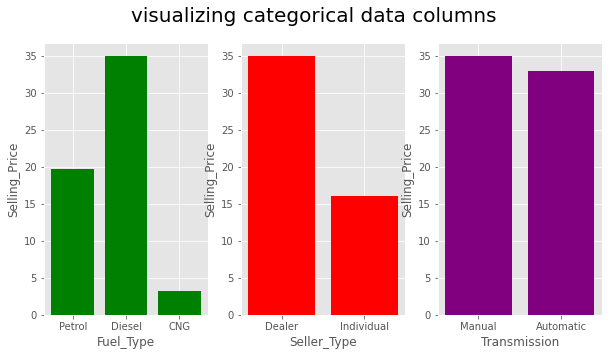

In [13]:
# ploting categorical data

fig=plt.figure(figsize=(10,5))
fig.suptitle('visualizing categorical data columns', fontsize=20)

plt.subplot(1,3,1)
plt.bar(df['Fuel_Type'], df['Selling_Price'],color= 'green')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')

plt.subplot(1,3,2)
plt.bar(df['Seller_Type'], df['Selling_Price'],color= 'red')
plt.xlabel('Seller_Type')
plt.ylabel('Selling_Price')

plt.subplot(1,3,3)
plt.bar(df['Transmission'], df['Selling_Price'],color= 'purple')
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')
plt.show()

In [14]:
# Get the dummy variables
df1 = pd.get_dummies(df, drop_first=True)
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,4,0,1,0,1
1,4.75,9.54,43000,0,5,1,0,0,1
2,7.25,9.85,6900,0,1,0,1,0,1
3,2.85,4.15,5200,0,7,0,1,0,1
4,4.60,6.87,42450,0,4,1,0,0,1


In [15]:
# Applying the log-transformations

# df1["Kms_Driven"] = np.log(df1["Kms_Driven"])
# df1["Present_Price"] = np.log(df1["Present_Price"])
# df1["Present_Price_2"] = np.square(df1["Present_Price"])
# df1["Selling_Price"] = np.log(df1["Selling_Price"])

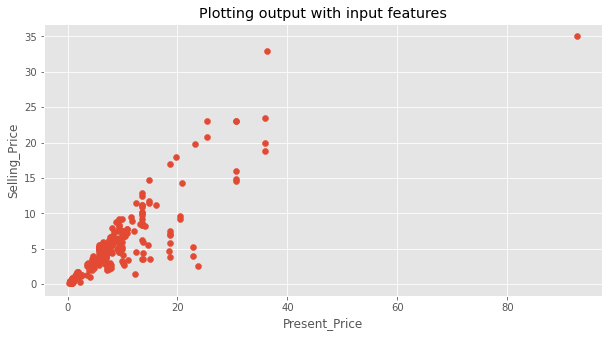

In [16]:
# Plotting output with input features

fig=plt.figure(figsize=(10,5))
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.title("Plotting output with input features")
plt.scatter(df1.Present_Price, df1.Selling_Price)
plt.show()

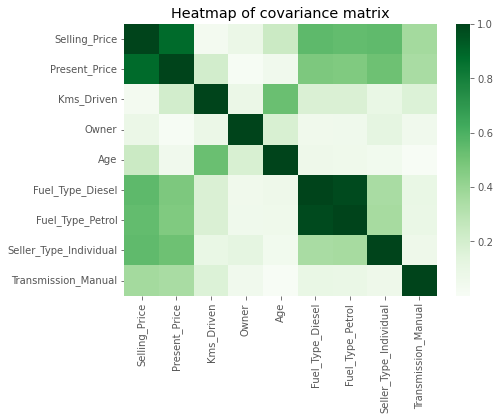

In [17]:
# Plotting the covariance matrix

fig=plt.figure(figsize=(7,5))
sns.heatmap(df1.corr().abs(), cmap=plt.get_cmap('Greens'))
plt.title("Heatmap of covariance matrix")
plt.show()
# you can learn more about ploting heatmap using seaborn via:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# or:
# https://zhuanlan.zhihu.com/p/165426873

In [18]:
# Preparing the training and test data 
X = df1.drop("Selling_Price", axis=1)
y = df1["Selling_Price"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)
print("train size: ", train_X.shape[0])
print("test size: ", test_X.shape[0])

train size:  210
test size:  91


In [19]:
# Fiting the Linear Regression model
linear_reg = linear_model.LinearRegression().fit(train_X, train_y)

# Printing of results
print("intercept_: \n", linear_reg.intercept_)
print("coef_: \n", linear_reg.coef_)
print("Test R_squared: ", linear_reg.score(test_X, test_y)) # R_squared on test data
print("Training R_squared: ", linear_reg.score(train_X, train_y)) # R_squared on test data
 # R_squared on training data


intercept_: 
 4.203294992158299
coef_: 
 [ 4.19354923e-01 -5.79253120e-06 -9.04856428e-01 -4.02481200e-01
  3.12146032e+00  7.21540185e-01 -1.09180451e+00 -1.67473309e+00]
Test R_squared:  0.824267290744259
Training R_squared:  0.8905248642407648


In [20]:
# An alternative way:
import statsmodels.api as sm
linear_reg1 = sm.OLS(train_y, sm.add_constant(train_X)).fit()
linear_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     204.4
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           3.60e-92
Time:                        10:14:12   Log-Likelihood:                -423.82
No. Observations:                 210   AIC:                             865.6
Df Residuals:                     201   BIC:                             895.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.2033      1.917      2.192      0.030       0.422       7.984
Present_Price              0.4194      0.018     23.182      0.000       0.384       0.455
Kms_Driven             -5.793e-06   3.61e-06     -1.604      0.110   -1.29e-05    1.33e-06
Owner                     -0.9049      0.473     -1.911      0.057      -1.838       0.029
Age                       -0.4025      0.052     -7.667      0.000      -0.506      -0.299
Fuel_Type_Diesel           3.1215      1.896      1.646      0.101      -0.618       6.861
Fuel_Type_Petrol           0.7215      1.873      0.385      0.701      -2.972       4.415
Seller_Type_Individual    -1.0918      0.325     -3.363      0.001      -1.732      -0.452
Transmission_Manual       -1.6747      0.399     -4.195      0.000      -2.462      -0.888
==============================================================================
Omnibus:                       76.833   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              445.887
Skew:                           1.273   Prob(JB):                     1.50e-97
Kurtosis:                       9.669   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

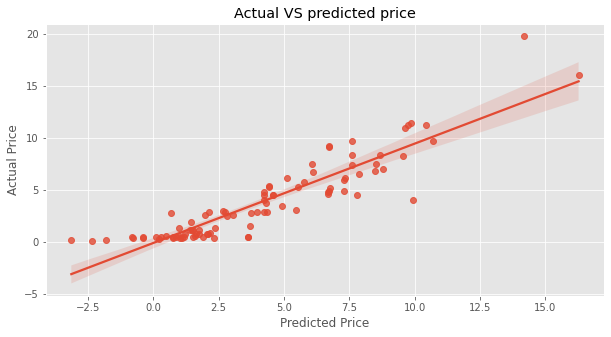

In [21]:
# Plot Actual values vs fitted values
fig=plt.figure(figsize=(10,5))
sns.regplot(x=linear_reg.predict(test_X), y=test_y)
plt.xlabel ('Predicted Price')
plt.ylabel ('Actual Price')
plt.title('Actual VS predicted price')
plt.show()

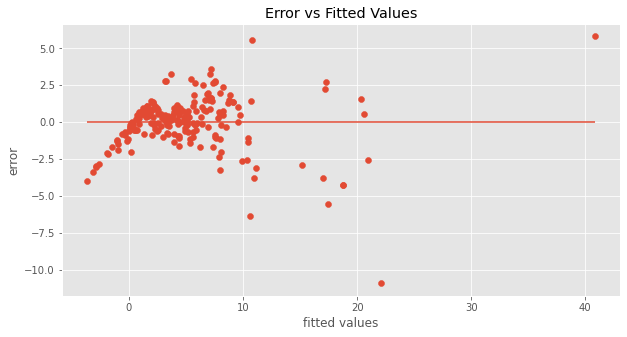

In [22]:
# Plot error vs fitted values
fig=plt.figure(figsize=(10,5))
plt.scatter(linear_reg.predict(train_X), linear_reg.predict(train_X)-train_y)
plt.hlines(0, min(linear_reg.predict(train_X)), max(linear_reg.predict(train_X)))
plt.xlabel ('fitted values')
plt.ylabel ('error')
plt.title('Error vs Fitted Values')
plt.show()

In [23]:
# Lasso Regression

lasso_reg = linear_model.Lasso(alpha=0.001)
lasso_reg = lasso_reg.fit(train_X, train_y)
print("LASSO: ")
print("test score: ", lasso_reg.score(test_X, test_y))
print("train score: ", lasso_reg.score(train_X, train_y))
print("OLS: ")
print("test score: ", linear_reg.score(test_X, test_y))
print("train score: ", linear_reg.score(train_X, train_y))
# print("LASSO coef: \n", lasso_reg.coef_)
# print("OLS coef: \n", linear_reg.coef_)

LASSO: 
test score:  0.8247119284718254
train score:  0.8904956221840143
OLS: 
test score:  0.824267290744259
train score:  0.8905248642407648


In [24]:
# Turning the parameters for LASSO

params = {"alpha": list(0.001*i for i in range(1, 1000, 5))}
# params = {"alpha": list(0.001*i for i in range(5, 30))}
cross_validation = RepeatedKFold(n_splits=5, n_repeats=3, random_state=4)
grid_search = GridSearchCV(lasso_reg, params, n_jobs=1, cv=cross_validation)
search_result = grid_search.fit(train_X, train_y)
print("best parameter: ", search_result.best_params_)


best parameter:  {'alpha': 0.006}


In [25]:
# Ridge Regression

ridge_reg = linear_model.Ridge(alpha=10)
ridge_reg.fit(train_X, train_y)
ridge_reg.score(test_X, test_y)
print("Ridge: ")
print("test score: ", ridge_reg.score(test_X, test_y))
print("train score: ", ridge_reg.score(train_X, train_y))
# print("OLS: ")
# print("test score: ", linear_reg.score(test_X, test_y))
# print("train score: ", linear_reg.score(train_X, train_y))
# print("Ridge coef: \n", ridge_reg.coef_)
# print("LASSO coef: \n", lasso_reg.coef_)
# print("OLS coef: \n", linear_reg.coef_)

Ridge: 
test score:  0.8384704619128389
train score:  0.8878493660315409


## Be Happy!
## Thanks!